# Business Understanding
## 1.1 Intro to Contacts
Legal contacts are an essential part of every business that willing to comment any part of agreement. Contacts are very well written and structured to form a strong and precise set of conditions to be followed. Writing legal clauses require professionals and lawyers to construct the best way to specify a condition. In nature, human have intellectual thinking of designing a meaning of context from different perspective that achieve same goal. The idea of contracts is to create a mutual writing agreement between two parties that each can abide to the terms and conditions. If there is a business, there is a contract therefore we can imagine that there are tons of contracts has been written and millions of terms were included in legal documents to form a sophisticated set of order. Since human share a common sense of way to communicate and think, we can look more in-depth of how lawyers write their clauses and how similar it looks, how frequent the words used in, what is the important words that is included in clauses that is related to specific type of legal document.

## 1.2 Contracts and NLP in-depth:
By allowing computer interactions, we can dig deeper to how we want to understand legal documents. We can use natural language processing (NLP) which is a subfield of linguistics and computer that is specializes in artificial intelligence to analyze textual big data. The process of analyzing texts can be segmented into supervised and unsupervised learning. Mostly, NLP aims to solve unsupervised learning that has far more challenges and complex structures. In this paper, I will explore some of the major and most recent implications of how to use NLP.


In order to deep dive into legal terms, the most fundamental questions are to understand NLP common practices when analyzing texts using NLP methodologies such as ‘term frequency’, ‘term frequency–inverse document frequency (Tf-idf)’, ‘word embedding’, and ‘sentiment analysis’
- Question 1: What are the most frequent terms in Legal Clause
- Question 2: Most Frequent Words By Clause Type
- Question 3: How Important a term to document? Using Tf-idf
- Question 4 :Can we find Relationship Between Legal Terms
- Question 5: How each Clause is explained based by topics.
- Question 6: Does Sentiment Analysis work best in Legal terms?

# 2. Data Understanding
From this data, we will be using Frequency Analysis, TF/IDF Weighting, Bag of Words Classification, Word Embeddings, Skip-Gram/CBOW and Latent Dirichlet Allocation (LDA).

## 2.1 Data
There are few ways to access legal document since they are more confidential, and most companies are conservative to expose these types of conditions. I found a source that is an open source for clauses examples to help lawyers pick any type of clauses and add it in contract

## 2.2 Data Collection:
My data source is from LawInsider.com where I have collected over 21k legal clauses from 16 type of clauses that are related to ‘finance’. I used python using different type of libraries for scraping since the website keep blocking automated querying from the website, so I used selenium library to extract clause text and clause type.


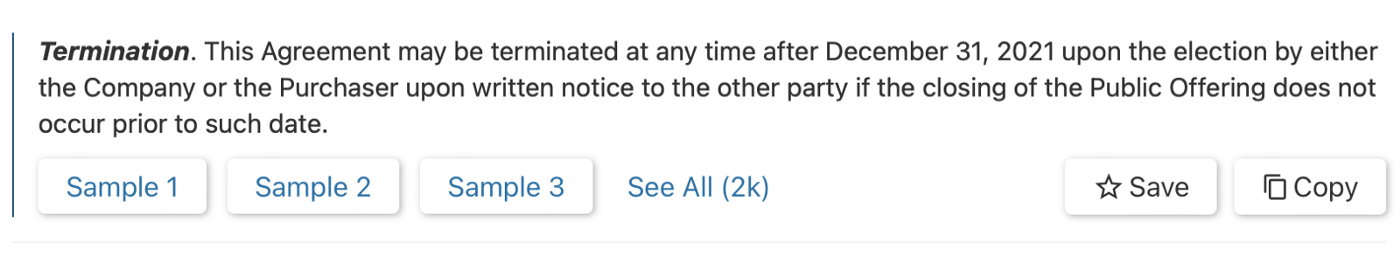

## 2.3 Data Overview
I only extract clause type and clause text to perform unsupervised analysis.

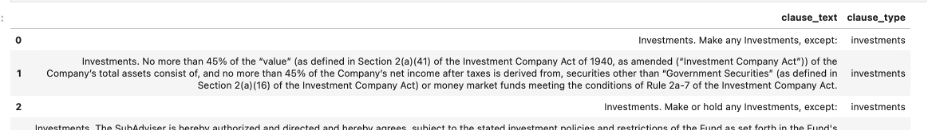

We can see from the above figure how the final data will look like and its ready to be analyzed and explore the business question we are interested in.

# 3. Data Preparation
after we collected the data, the data need to be in a most suitable format and structure.
## 3.1 Data Processing
The data needs to be cleaned and processed to be able to use our methods. In order to structure the data to our methods, we need to remove numbers, symbols and punctuations. I am using lemmatize method to clean text from the corpus.

In [15]:
knitr::opts_chunk$set(echo = TRUE)

In [36]:
source('/Users/mo/Desktop/Desktop/Work/Github/NLP_in_legal_contracts/Functions/pre-processing - nlp.R')

In [37]:
path <- "'/Users/mo/Desktop/Desktop/Work/Github/NLP_in_legal_contracts/Functions/load_nlp_env.R'"
load_NLP_env(path)

[1] "functions loaded:  "


In [38]:
file_path <- "/Users/mo/Desktop/Desktop/Work/Github/NLP_in_legal_contracts/Data/legal_docs.csv"
data <- read.csv(file_path)

### Pre-processing Corpus:

In [39]:
head(data,5)

X,clause_text,clause_type,totalwords,totalletters
0,"Make any Investments, except:",investments,4,30
1,"No more than 45% of the “value” (as defined in Section 2(a)(41) of the Investment Company Act of 1940, as amended (“Investment Company Act”)) of the Company’s total assets consist of, and no more than 45% of the Company’s net income after taxes is derived from, securities other than “Government Securities” (as defined in Section 2(a)(16) of the Investment Company Act) or money market funds meeting the conditions of Rule 2a-7 of the Investment Company Act.",investments,76,460
2,"Make or hold any Investments, except:",investments,6,38
3,"The SubAdviser is hereby authorized and directed and hereby agrees, subject to the stated investment policies and restrictions of the Fund as set forth in the Fund's prospectus, summary prospectus and/or statement of additional information, in each case as currently in effect and as supplemented or amended from time to time (collectively referred to hereinafter as the “Prospectus”) and subject to the directions and continuous oversight of the Adviser and the Fund’s Board of Trustees, to (i) regularly provide investment advice and recommendations to the Fund with respect to the Fund’s investments, investment policies and the purchase and sale of securities and other investments; (ii) supervise continuously the investment program of the Fund and the composition of its portfolio and determine what securities and other investments shall be purchased or sold by the Fund; and (iii) arrange, subject to the provisions of paragraphs (c) and (d) below, for the purchase of securities, and other investments for the Fund and the sale of securities and other investments held in the portfolio of the Fund. The Adviser agrees to provide the SubAdviser with such assistance as may be reasonably requested by the SubAdviser in connection with its activities under this Agreement, including, without limitation, information concerning the Fund, its assets available, or to become available, for investment and generally as to the conditions of the Fund or the Fund’s affairs.",investments,228,1474
4,"Make any advance, loan, extension of credit (by way of guaranty or otherwise) or capital contribution to, or purchase any Capital Stock, bonds, notes, debentures or other debt securities of, or any assets constituting a business unit of, or make any other investment in, any Person (all of the foregoing, “Investments”), except:",investments,52,329


In [40]:
text <- pre_process_corpus(data, "clause_text", replace_numbers = T, root_gen = "lemmatize" )
data$clause_preprocessed <- text

### Post-Processing Corpus:

In [18]:
head(data$clause_preprocessed,5)

[1] "make investment except"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
[2] "value define section investment company act amend investment company act company s total asset consist company s net income tax derive security government security define section investment company act money market fund meet condition rule a investment company act"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
[3] "make hold investment except"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
[4] "subadviser hereby authorize direct hereby agree subject state investment policy restriction fund set forth fund prospectus summary prospectus statement additional information case currently effect supplement amend time time collectively refer hereinafter prospectus subject direction continuous oversight adviser fund s board trustee regularly provide investment advice recommendation fund respect fund s investment investment policy purchase sale security investment ii supervise continuously investment program fund composition portfolio determine security investment shall purchase sell fund iii arrange subject provision paragraph c have purchase security investment fund sale security investment hold portfolio fund adviser agree provide subadviser assistance may reasonably request subadviser connection activity agreement include without limitation information concern fund asset available become available investment generally condition fund fund s affair"
[5] "make advance loan extension credit way guaranty otherwise capital contribution purchase capital stock bond note deb

## 3.2 Data Structuring
Once we have processed our data, we are going to convert the data into matrix and vectors to increase speed and reduce computation time. Also, construct a DTM that includes unigrams, bigrams, and trigrams which create several grams from words that comes together

In [19]:
library(stringr)

grams <- itoken(data$clause_preprocessed, tokenizer = word_tokenizer, ids = data$X)
vocab <- create_vocabulary(grams, ngram = c(1,3))

lbound <- round(0.0009 * nrow(data))

vocab <- vocab[vocab$doc_count > 20,]

vocab$ngram <- str_count(vocab$term, "_")+1

vectorizer <- vocab_vectorizer(vocab)
dtm_legal <- create_dtm(grams, vectorizer)
dim(dtm_legal)


Attaching package: ‘stringr’


The following object is masked _by_ ‘.GlobalEnv’:

    sentences




[1] 21187 13103

In [20]:
freq_table <- data.frame(term = colnames(dtm_legal), n = colSums(dtm_legal),
                         freq = colSums(dtm_legal)/sum(dtm_legal))

freq_table <- freq_table[order(freq_table$freq, decreasing = T),]
freq_table$ngram <- str_count(freq_table$term, "_")+1

# 4. Evaluating the Results
I will explore in depth how we can unlock the hidden insights of legal documents to better understand how interpretations were formed and how words are used in different structure yet have values.

### Question 1: What are the most frequent terms in Legal Clause

In [22]:
head(freq_table,5)

,term,n,freq,ngram
shall,shall,27819,0.014346835,1
agreement,agreement,23640,0.012191638,1
company,company,21405,0.011039002,1
share,share,13860,0.007147889,1
party,party,10988,0.005666739,1


This datafrrame shows the each term, n = number of time a term appreaed, freq= frequency of term accros all terms, ngram = if the term is single, two or three words, rank = ranking top freq.
As we notice that these are the most frequent words used in legal clauses with most frequent. We see that ‘shall’ and ‘agreement’ are the highest and we see some common words that are mostly used in finance clauses such as ‘share’ and ‘stock’

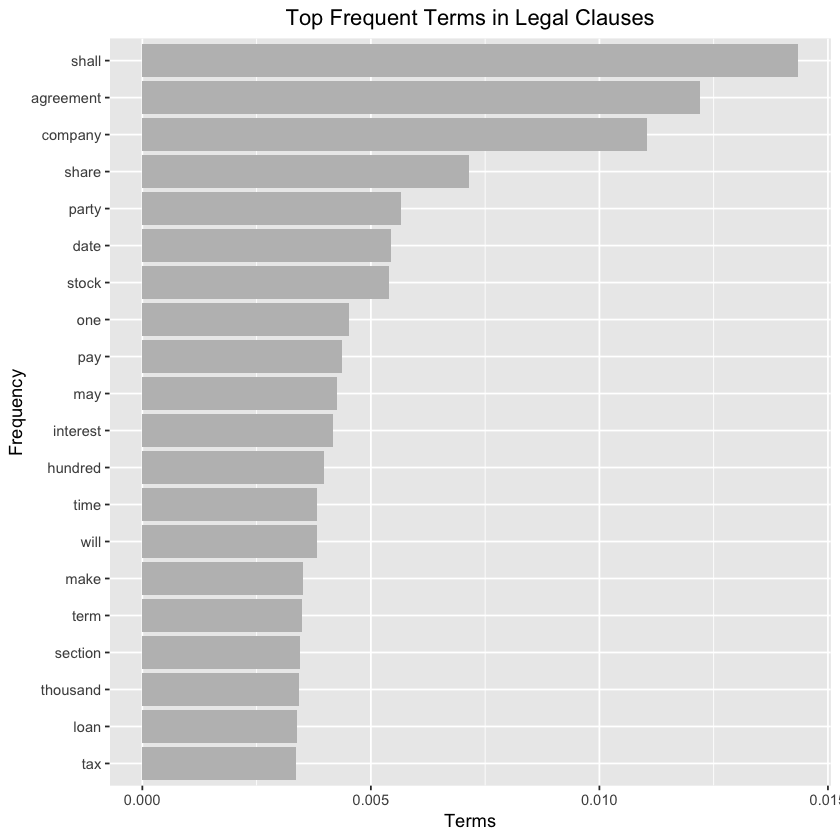

In [23]:
# Where most frequent words based on clause type

clause_type_chr <- tolower(unique(data$clause_type))
df <- freq_table[freq_table$term %in% clause_type_chr, ]
top_terms <- head(freq_table,20)
ggplot(top_terms,aes(x = reorder(term, freq), y = freq, fill = term)) +
geom_bar(stat = "identity", show.legend = F, , fill='Grey') + coord_flip() + xlab("clause_type") + 
  labs(y= "Terms", x= "Frequency",
       title = "Top Frequent Terms in Legal Clauses") + 
  theme(plot.title = element_text(hjust = 0.5))
ggsave("Top Frequent Terms in Legal Clauses.png", units="in", width=5, height=4, dpi=720)

Now we can visualize the top 20 frequent terms and see which seems more common than the other.

#### Zipf’s Law where frequency that a word appears is inversely proportional to its rank.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


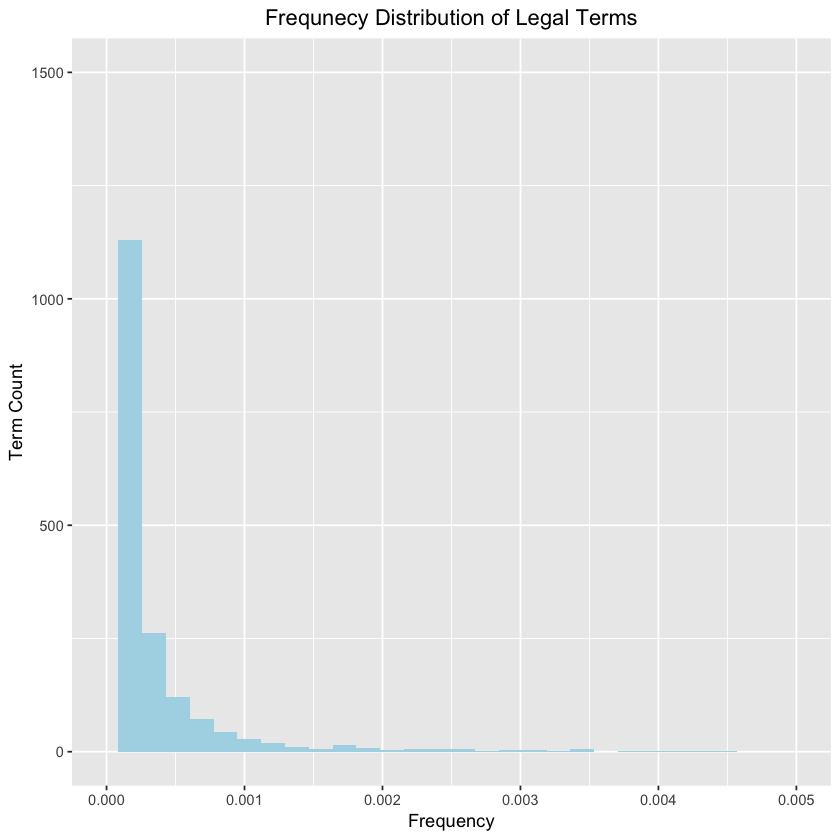

In [25]:
ggplot(freq_table, aes(freq)) + 
  geom_histogram(fill = 'lightblue') + lims(x= c(0.0,0.005), y=c(0,1500))+
  labs(y = "Term Count", x= "Frequency",
       title = "Frequnecy Distribution of Legal Terms") + theme(plot.title = element_text(hjust = 0.5))
ggsave("Zipf’s Law where frequency.png", units="in", width=5, height=4, dpi=720)

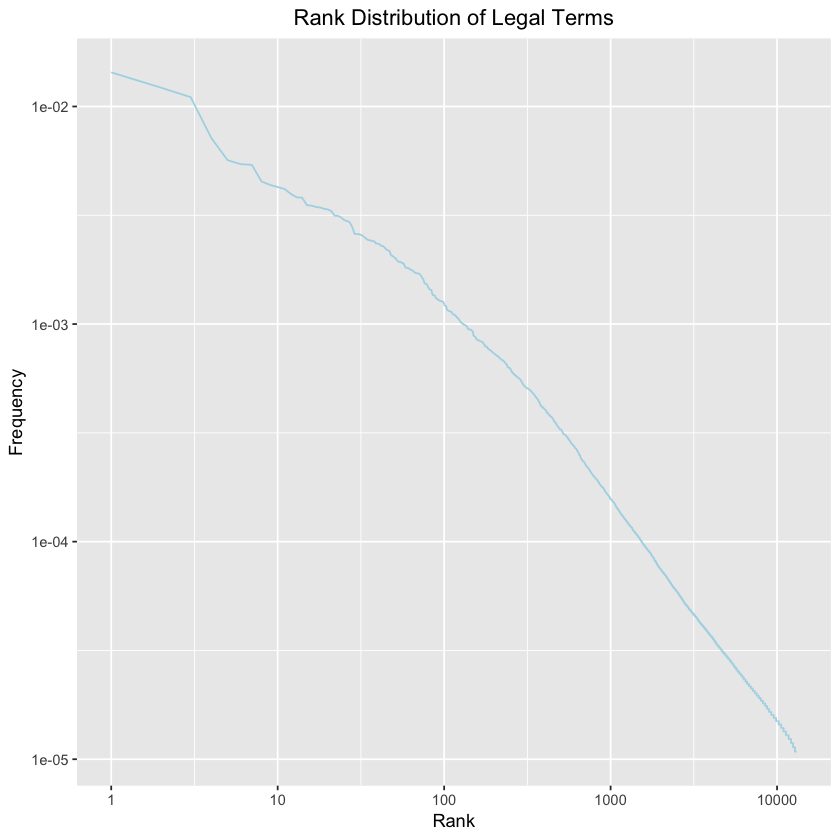

In [26]:
freq_table$rank <- 1:nrow(freq_table)
ggplot(freq_table, aes(rank, freq)) + geom_line(color = 'lightblue') + scale_x_log10() + scale_y_log10() + 
  labs(x = "Rank", y= "Frequency",
       title = "Rank Distribution of Legal Terms") + theme(plot.title = element_text(hjust = 0.5))
ggsave("Zipf’s Law Rank.png", units="in", width=5, height=4, dpi=720)

### Question 2: Most Frequent Words By Clause Type


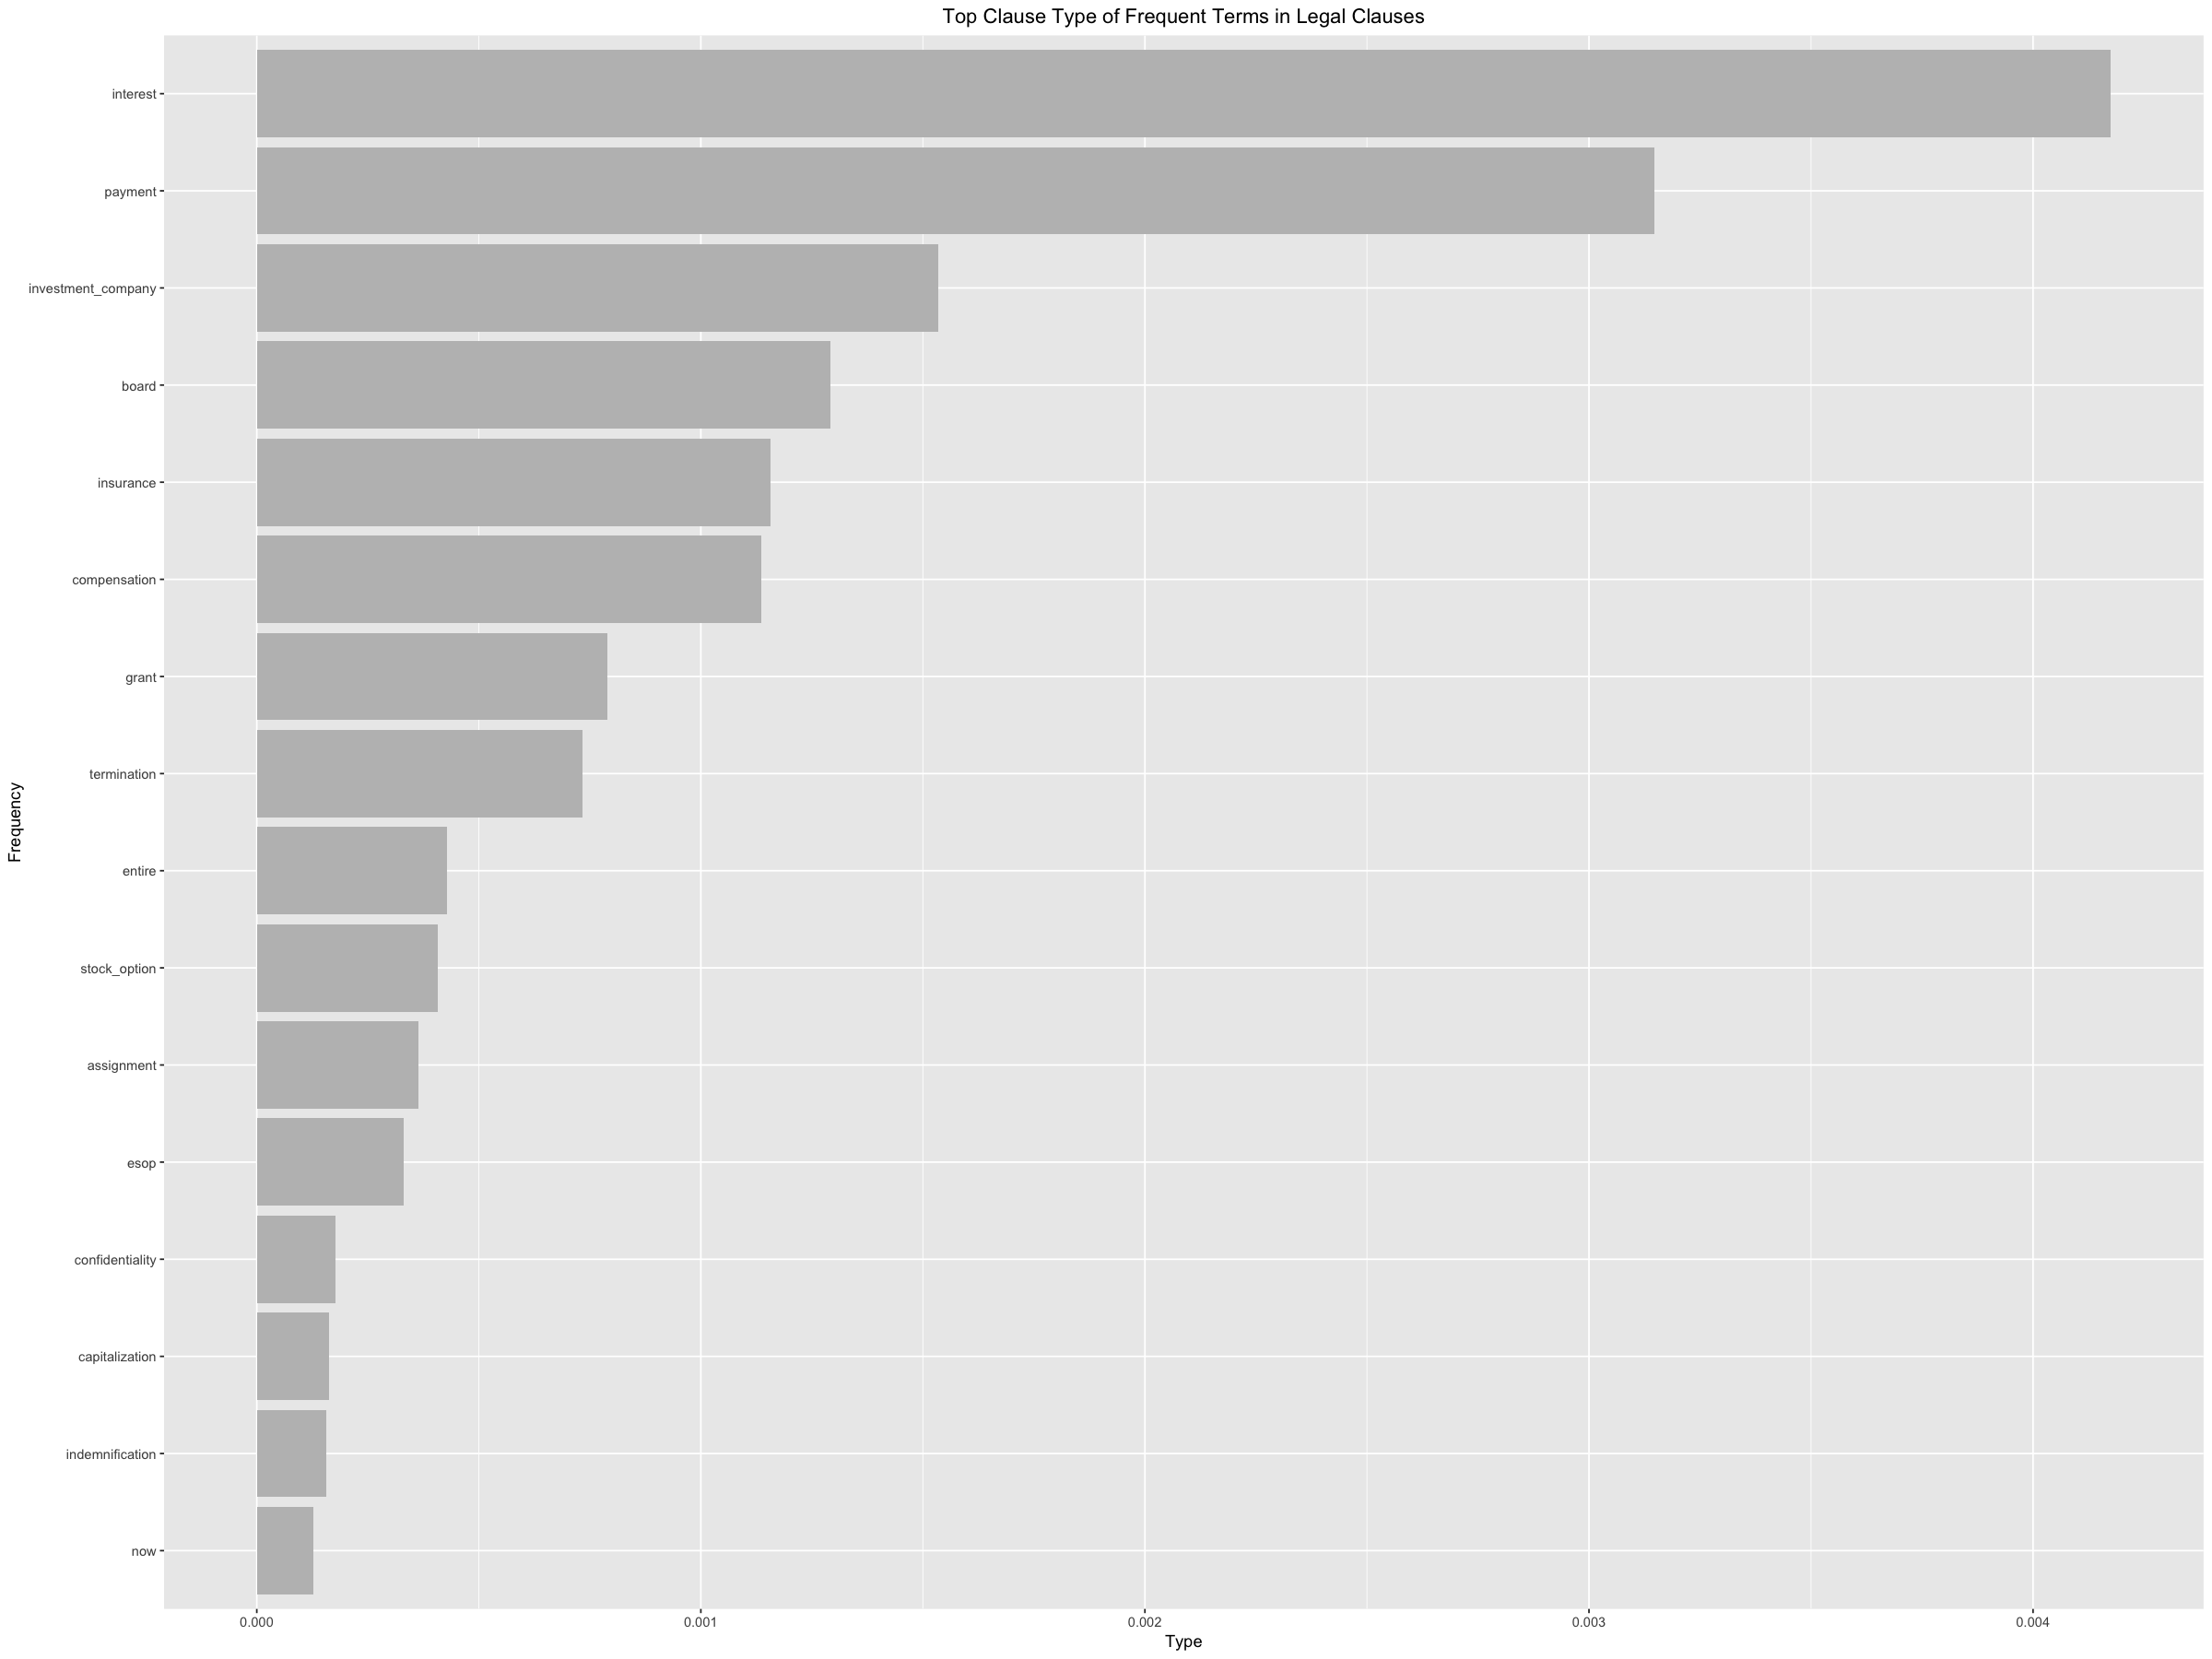

In [69]:
ggplot(df,aes(x = reorder(term, df$freq), y = freq, fill = term)) +
  geom_bar(stat = "identity", show.legend = F, fill='Grey') + coord_flip() + xlab("clause_type") + 
  labs(y= "Type", x= "Frequency",
       title = "Top Clause Type of Frequent Terms in Legal Clauses") + 
  theme(plot.title = element_text(hjust = 0.5)) 
ggsave("Top Clause Type of Frequent Terms in Legal Clauses.png", units="in", width=5, height=4, dpi=720)

Now we can see how each term frequency by clause type which means that the terms that have the higher counts are places clause types. We notice that interests and payment clause type are the highest. This can tell us that most frequent terms are in these two types


### Question 3: How Important a term to document? Using Tf-idf


Now that we have understand the most frequent words, we want to know the important words to each type of clause which has been used more often and famous in other types too. In this process we take into consideration all weighted relevance of terms and compute it across all documents to get the importance score of tf-idf weighted. the IDF is calculated by taking the natural log of the ratio of total number of documents to number of documents in which the term appears.


In [61]:
# tf-idf of words accross all type of clauses # Top 10 words using tf_idf in each clasue type
options(repr.plot.width=10, repr.plot.height=12)


library(dplyr)
library(janeaustenr)
library(tidytext)
library(forcats)

freq_table1 <- data %>%
  unnest_tokens(word, clause_preprocessed) %>%
  count(clause_type, word, sort = TRUE)

total_words <- freq_table1 %>% 
  group_by(clause_type) %>% 
  summarize(total = sum(n))

freq_table1 <- left_join(freq_table1, total_words)

df_tf_idf <- freq_table1 %>%
  bind_tf_idf(word, clause_type, n)


types <- c('financing',"grabt_of_option", "interest", "investments", "loan", "ownership_of_shares", "taxes", 'vesting', "Termination", "Insurance")

df_tf_idf <- df_tf_idf %>%
  group_by(clause_type) %>%
  slice_max(tf_idf, n = 10) %>%
  ungroup()

Joining, by = "clause_type"



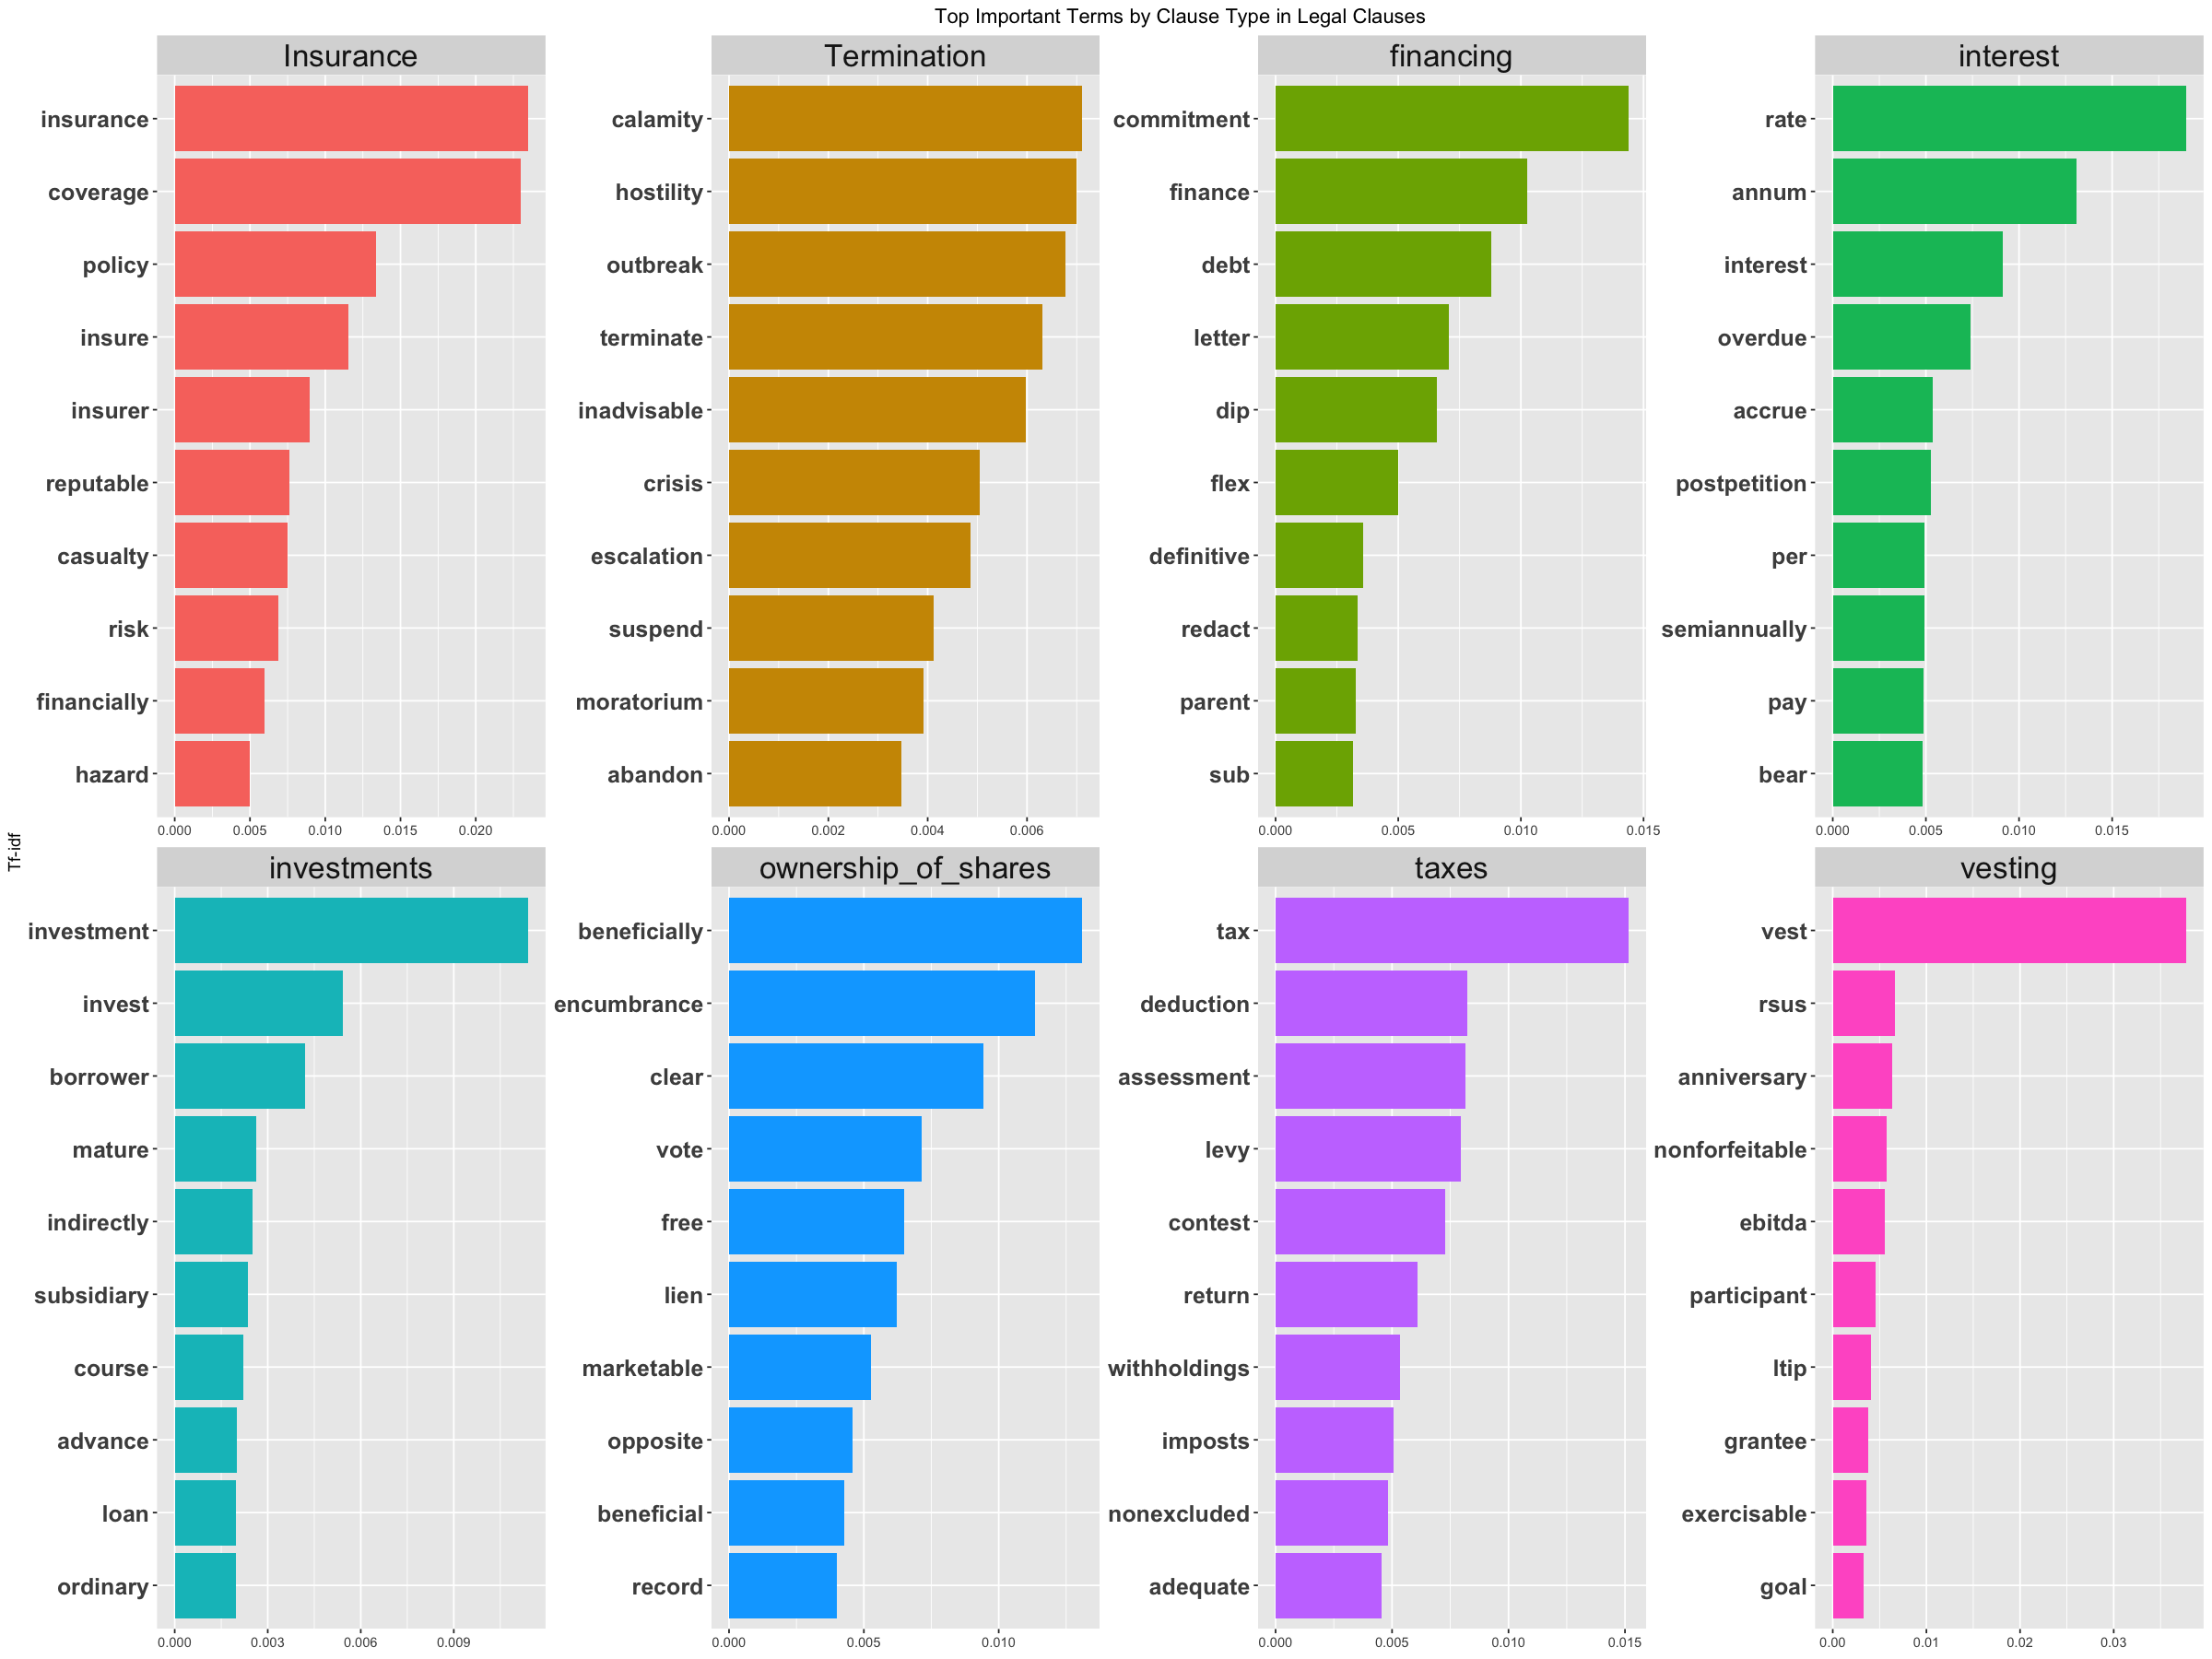

In [64]:
options(repr.plot.width=20, repr.plot.height=15)

p1 <- ggplot(subset(df_tf_idf, 
                    clause_type %in% types), 
             aes(fct_reorder(word, tf_idf),tf_idf, fill = clause_type)) +
  geom_col(show.legend = FALSE, position = position_dodge(width=1)) +
  facet_wrap(~clause_type, ncol=4, scales = "free") +
  labs(x = "tf-idf", y = NULL)
p1 + coord_flip() +
  labs(x= "Tf-idf",
       title = "Top Important Terms by Clause Type in Legal Clauses") + 
  theme(plot.title = element_text(hjust = 0.5), 
        strip.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 15, face='bold')) 
# ggsave("Top Important Terms by Clause Type in Legal Clauses.png", units="in", dpi=720)

After taking into consideration of all clause types, I only picked the most relevant topics to see how these types are explained by their important terms. In financing, we can see that the important word is ‘commitment’ and debt since these are reasonably explain what financing means. In interests, we notice that the top term is rate and annum and that tell us that interests must have some type of rates and maybe calculated by annual year.


In [65]:
head(df_tf_idf,5)

clause_type,word,n,total,tf,idf,tf_idf
Assignment,assign,1181,30070,0.039275025,0.3036824,0.011927134
Assignment,inure,223,30070,0.007416029,1.5404450,0.011423986
Assignment,assignment,496,30070,0.016494845,0.5187938,0.008557423
Assignment,assignee,162,30070,0.005387429,1.3397743,0.007217940
Assignment,void,163,30070,0.005420685,1.1727203,0.006356947


### Question 4 :Can we find Relationship Between Legal Terms
In word embedding, we want to understand how words are related to each other such as that how two words together represent another similar from other words.

In [66]:
# Relationships between Words using Skip-Gram/CBOW Models Word Embeddings

skipgrams <- unnest_tokens(data, ngram, clause_preprocessed, token = "ngrams", n = 9)
skipgrams$ngramID <- 1:nrow(skipgrams)
skipgrams$skipgramID <- paste(skipgrams$X_unit_id, skipgrams$ngramID, sep = '_')

skipgrams <- unnest_tokens(skipgrams, word, ngram)

library(widyr)
skipgram_probs <- pairwise_count(skipgrams, word, skipgramID, diag = T, sort = T)
skipgram_probs$p <- skipgram_probs$n/sum(skipgram_probs$n)
skipgram_probs[1:30,]


unigram_probs <- unnest_tokens(data, word, clause_preprocessed)
unigram_probs <- count(unigram_probs, word, sort = T)
unigram_probs$p <- unigram_probs$n/sum(unigram_probs$n)


lbound <- 20
normed_probs <- skipgram_probs[skipgram_probs$n > lbound,]
colnames(normed_probs) <- c('word1', 'word2', 'n', 'p_all')

normed_probs <- merge(normed_probs, unigram_probs[, c('word', 'p')], by.x = 'word2', by.y = 'word', all.x = T)
normed_probs <- merge(normed_probs, unigram_probs[, c('word', 'p')], by.x = 'word1', by.y = 'word', all.x = T)

normed_probs$p_combined <- normed_probs$p_all/normed_probs$p.x/normed_probs$p.y

normed_probs <- normed_probs[order(normed_probs$p_combined, decreasing = T),]
normed_probs$pmi <- log(normed_probs$p_combined)

normed_probs[normed_probs$word1 == 'bank',][1:20,]

pmi_matrix <- cast_sparse(normed_probs, word1, word2, pmi)
pmi_matrix@x[is.na(pmi_matrix@x)] <- 0
dim(pmi_matrix)

Warning message:
“`distinct_()` was deprecated in dplyr 0.7.0.
Please use `distinct()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


item1,item2,n,p
shall,shall,189506,0.0026849483
agreement,agreement,131931,0.0018692174
company,company,128221,0.0018166536
share,share,97707,0.0013843268
stock,stock,74822,0.0010600889
date,date,72471,0.0010267795
party,party,69974,0.0009914017
pay,pay,60206,0.0008530073
may,may,59195,0.0008386833
one,one,58604,0.0008303099


,word1,word2,n,p_all,p.x,p.y,p_combined,pmi
36176,bank,russian,27,3.825399e-07,2.624775e-06,0.00187409,77.76681,4.353715
36432,bank,westminster,24,3.400355e-07,2.624775e-06,0.00187409,69.12605,4.235932
36569,bank,mainland,31,4.392125e-07,3.499700e-06,0.00187409,66.96586,4.204183
36532,bank,deutsche,243,3.442859e-06,2.974745e-05,0.00187409,61.75599,4.123191
36415,bank,bank,15129,2.143498e-04,1.874090e-03,0.00187409,61.02988,4.111364
35981,bank,not,21,2.975310e-07,2.624775e-06,0.00187409,60.48529,4.102400
36564,bank,comerica,26,3.683717e-07,3.499700e-06,0.00187409,56.16492,4.028292
35915,bank,royal,75,1.062611e-06,1.049910e-05,0.00187409,54.00473,3.989072
36539,bank,inadvertently,25,3.542036e-07,3.499700e-06,0.00187409,54.00473,3.989072
36283,bank,scotland,24,3.400355e-07,3.499700e-06,0.00187409,51.84454,3.948250


[1] 5439 5439

In [67]:
library(irlba)
pmi_svd <- irlba(pmi_matrix, 256, maxit = 1e3, fastpath=FALSE)
word_vectors <- pmi_svd$u
rownames(word_vectors) <- rownames(pmi_matrix)

In [68]:
new_vector <- word_vectors["share",] + word_vectors["finance",] 
similarities <- word_vectors %*% new_vector %>% as.data.frame() %>%
  rename(similarity = V1) %>% arrange(-similarity)
head(similarities)


new_vector <- word_vectors["company",] + word_vectors["investment",] 

similarities <- word_vectors %*% new_vector %>% as.data.frame() %>%
  rename(similarity = V1) %>% arrange(-similarity)
head(similarities)

,similarity
share,0.40515407
stock,0.23447345
finance,0.21553182
common,0.17126408
issue,0.09431215
debt,0.08353667


,similarity
investment,0.25668531
company,0.21980730
act,0.08079855
security,0.06553092
management,0.06476493
register,0.06404682


We can interpret from the above table that (share + finance) are interpreted as similar words to stock, common, issue and debt which somehow make since in the context of finance. Also, we see that (company + investment) has similarity to management and security which can be interpreted as a company with investments might have type security of stocks and managing.

In [36]:
# LDA Topics
library(stm)
library(Matrix)
sparse_corpus <- Matrix(dtm_legal, sparse = T)

stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



In [ ]:
topic_model2 <- stm(sparse_corpus, 
                    init.type = 'LDA', 
                    seed = 12345,
                    K = 8, 
                    control = list(alpha = 64))

In LDA, it uses a generic method to compare real data the results with real data. Every iterative maximization, its getting to the likelihood of the actual data by providing a distribution of topics. LDA uses a process called Gibbs Sampling to iterate towards the correct values.


In [40]:
topic_prevalence <- as.data.frame(topic_model2$theta)
paste("average prevalence", round(mean(apply(topic_prevalence, 1, max)),2))


topic_content <- as.data.frame(t(exp(topic_model2$beta$logbeta[[1]])))
topic_names <- apply(topic_content, 2, function(x) {paste(topic_model2$vocab[order(x,
                                      decreasing = T)[1:6]], collapse = " ")})
topic_names

[1] "average prevalence 0.77"

V1 
               "shall salary base executive company base_salary" 
                                                              V2 
                      "share stock company issue common hundred" 
                                                              V3 
                     "shall agreement fund notice service party" 
                                                              V4 
                          "interest date loan shall amount rate" 
                                                              V5 
                        "tax agreement shall party respect file" 
                                                              V6 
               "agreement shall provision term insurance affect" 
                                                              V7 
              "party agreement shall law obligation information" 
                                                              V8 
"company investment act investment_company security company_act"

In the above results we can see that we have 8 topics that consists of different words that form a topic about the whole corpus. This is very important to understand how the legal documents share commonality between each other forms of topics.


Saving 7 x 7 in image



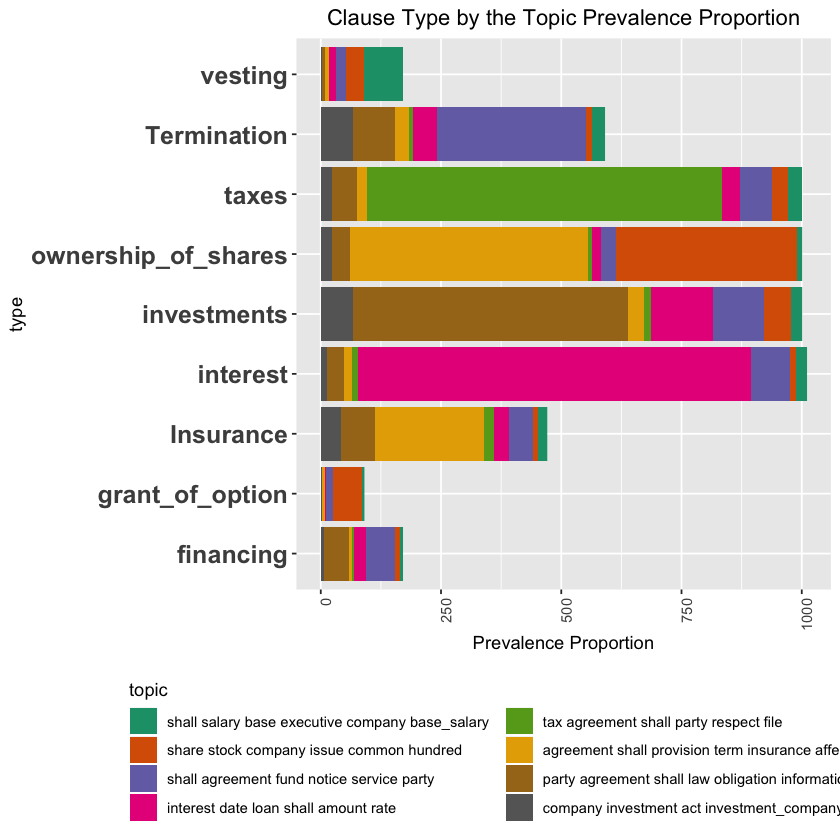

In [44]:
df <- topic_prevalence
colnames(df) <- topic_names
df$type <- as.character(data$clause_type)
df <- melt(df, id.vars = 'type', value.name = 'proportion', variable.name = 'topic')

library(pals)
p_topic <- ggplot(subset(df, type %in% types), aes(x = type, y = proportion, fill = topic)) + geom_bar(stat = 'identity')  + scale_fill_brewer(palette="Dark2") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), 
        axis.text.y = element_text(size=14),
        legend.position="bottom") +
  guides(fill = guide_legend(title.position = 'top', ncol = 2)) + coord_flip()
p_topic + 
  labs(y= "Prevalence Proportion",
       title = "Clause Type by the Topic Prevalence Proportion") + 
  theme(plot.title = element_text(hjust = 0.5), 
        strip.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 15, face='bold')) 
ggsave("Clause Type by the Topic Prevalence Proportion.png", units="in", dpi=720)


Now we can each topic based on the type of clauses. If we see the light green in ‘ownership_of_shares”, we can notice that its taking most portion of topics than other topics. We can interpret this type is as similar to most of words from the light-green topic such that ownership_of_shares is most known to be a share that someone can own in a company yet, the topic explain more about the this type of clause which tell us that shares include acquirer, b_common, _ company_series and common_stock, which means that ownerships are tide to classes of names of stocks


### Question 6: Does Sentiment Analysis Work Best in Legal Terms?


In this analysis, we want to know how each clause type has rating of sentiment of negative or positive sense. we can ask, does lawyers write negative or positive words to miniplate readers or at least do we find that reading contracts to be deceptive in its words? This hypothesis to understand if legal documents create some kind of bias. For example, do you find a clause that say, “you shall agree to commit to pay this ugly/beautiful property for 30 years”.


To answer this, we will try to design our dataframe from unsupervised to supervized by adding lavels to our data. I will be adding two lexicon libraries that label our terms from negative = -5 to positive = 5 for experimentation and identify how they differ and support our claim. We are going to use Afinn and NRC libraries to compare their score and Valence by our Clause Type.


### Sentiments Analyis on Unsupervised by legal clauses types

In [48]:
# Sentiments Analyis on Unsupervised legal clauses

library(syuzhet)
library(textdata)
afinn <- get_sentiments("afinn")


data$sentiment <- get_sentiment(data$clause_preprocessed)

Joining, by = "word"

Joining, by = "word"



pdf 
  2

[1] 1.663889

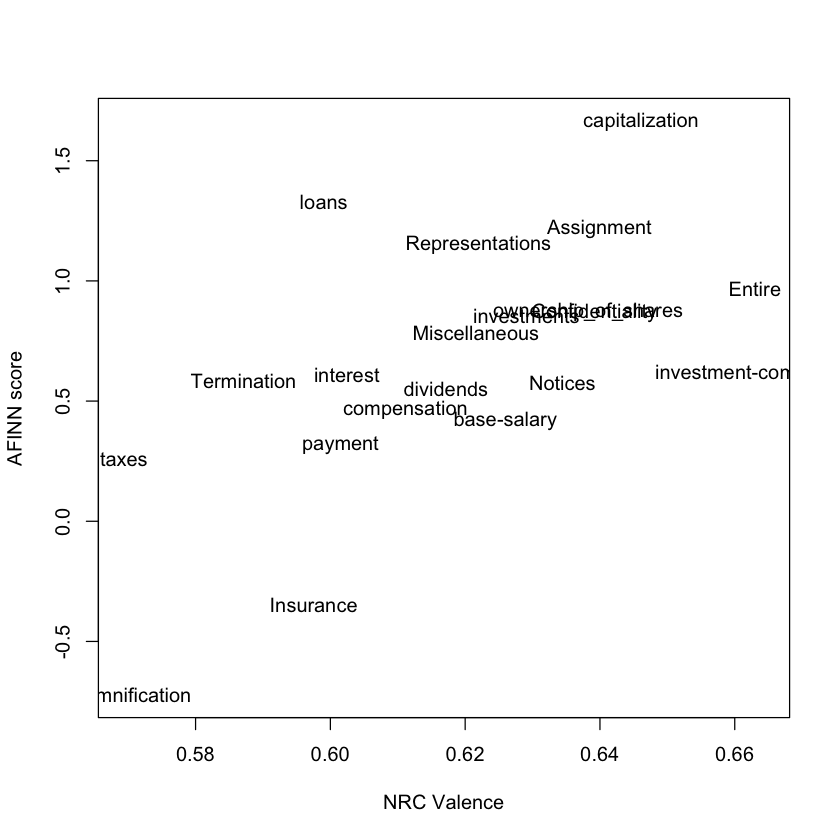

In [49]:
data %>% 
  unnest_tokens(word, clause_preprocessed) -> wordsdf

wordsdf %>% 
  inner_join(get_sentiments("afinn")) %>%
  group_by(clause_type) %>%
  summarize(sent=mean(value), n=n()) %>%
  arrange(desc(n)) %>%
  arrange(desc(sent)) -> afinndf

download.file("https://saifmohammad.com/WebDocs/VAD/NRC-VAD-Lexicon-Aug2018Release.zip", destfile="NRCVAD.zip")
unzip("NRCVAD.zip")

Valencedf <- read.table("NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/v-scores.txt", header=F, sep="\t")
names(Valencedf) <- c("word","valence")
vdf <- tibble(Valencedf)

wordsdf %>% 
  inner_join(vdf) %>%
  group_by(clause_type) %>%
  summarize(meanvalence=mean(valence), n=n()) %>%
  arrange(desc(n)) %>%
  head(20) %>%
  arrange(desc(meanvalence)) -> nrcdf

joindf <- inner_join(nrcdf, afinndf, by="clause_type")
plot(joindf$meanvalence, joindf$sent, type="n", xlab="NRC Valence", ylab="AFINN score")
text(joindf$meanvalence, joindf$sent, joindf$clause_type)



jpeg('sent.jpg')
dev.off()

max(afinndf$sent)

From the figure above we notice location of each type are vary but looking closely on the x-axis and y-axis, we can see how they are placed from 0 to 1.2 and these are ranging from -5 to 5. This means that all types are located in the middle of the scale and tell us how terms are ambiguous in clauses and that do not include positive nor negative words. And this is exactly how lawyers want to achieve clauses interpretation to not mislead business into conflict and construct words in a most formal and professional way.


In [51]:
cor.test(joindf$meanvalence, joindf$sent)


	Pearson's product-moment correlation

data:  joindf$meanvalence and joindf$sent
t = 3.2043, df = 18, p-value = 0.004916
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2184080 0.8251377
sample estimates:
      cor 
0.6026797 


### Sentiments Analyis on Unsupervised By Legal Clauses Terms

In [2]:
download.file("https://saifmohammad.com/WebDocs/VAD/NRC-VAD-Lexicon-Aug2018Release.zip", destfile="NRCVAD.zip")
unzip("NRCVAD.zip")
Valencedf <- read.table("NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/v-scores.txt", header=F, sep="\t")

In [6]:
path <- getwd()

In [8]:
write.csv(Valencedf, "NRC_vscore.csv")

Joining, by = "word"

Joining, by = "word"



[1] 11632

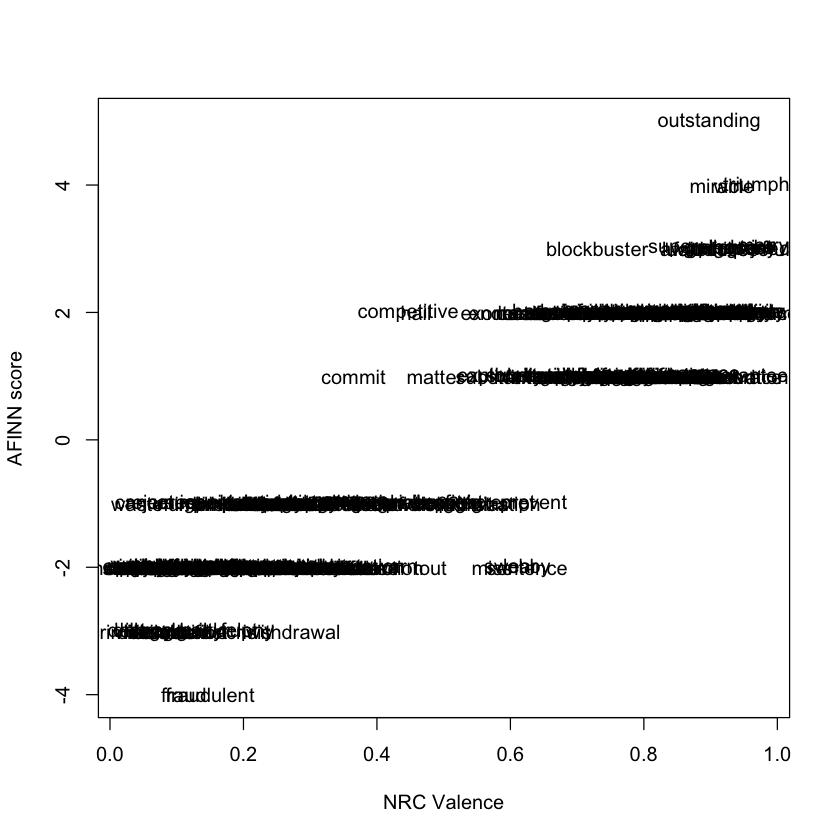

In [52]:
data %>% 
  unnest_tokens(word, clause_preprocessed) -> wordsdf

wordsdf %>% 
  inner_join(get_sentiments("afinn")) %>%
  group_by(word) %>%
  summarize(sent=mean(value), n=n()) %>%
  arrange(desc(n)) %>%
  arrange(desc(sent)) -> afinndf

download.file("https://saifmohammad.com/WebDocs/VAD/NRC-VAD-Lexicon-Aug2018Release.zip", destfile="NRCVAD.zip")
unzip("NRCVAD.zip")

Valencedf <- read.table("NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/v-scores.txt", header=F, sep="\t")
names(Valencedf) <- c("word","valence")
vdf <- tibble(Valencedf)

wordsdf %>% 
  inner_join(vdf) %>%
  group_by(word) %>%
  summarize(meanvalence=mean(valence), n=n()) %>%
  arrange(desc(n)) %>%
  arrange(desc(meanvalence)) -> nrcdf

joindf <- inner_join(nrcdf, afinndf, by="word")
plot(joindf$meanvalence, joindf$sent, type="n", xlab="NRC Valence", ylab="AFINN score")
text(joindf$meanvalence, joindf$sent, joindf$word)

length(unique(wordsdf$word))


In [53]:
cor.test(joindf$meanvalence, joindf$sent)


	Pearson's product-moment correlation

data:  joindf$meanvalence and joindf$sent
t = 42.004, df = 371, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8895491 0.9251373
sample estimates:
      cor 
0.9089856 


# 5. Conclusion and Future Work
Legal Document seems to be more ambiguous when it comes to sentiment analysis and not many supports of current libraries to for Legal Documents Terms since I had 100,00 unique terms but only 5,000 are found in Afinn and NRC. Legal Documents need more structures in understanding Grammars. LEXNLP Library is currently understanding documents such as duration of clause and when a document will expire. This type of implication can help lawyers stop skimming documents and use algorithms to easily find expired documents or clauses that will expire soon.